#DevFest 2023 - Data Science & AI/ML Demos

**Authors**: jlmarechaux@google.com

(October 2023)

..



---

**Responsible AI** is an approach to developing and deploying AI systems that takes into account the ethical, legal, and social implications of the technology. It is about using AI in a way that is safe, fair, and beneficial to society.
For further information, refer to the following:
* Montréal declaration for a responsible development of artificial intelligence: https://montrealdeclaration-responsibleai.com/
* Google Responsible AI:
https://ai.google/responsibility/principles/



---



**DEMO CODE - DO NOT USE IN PRODUCTION**

In [ ]:
###########################################################################
#
#  Copyright 2023 Google Inc.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      https://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
# This solution, including any related sample code or data, is made available
# on an “as is,” “as available,” and “with all faults” basis, solely for
# illustrative purposes, and without warranty or representation of any kind.
# This solution is experimental, unsupported and provided solely for your
# convenience. Your use of it is subject to your agreements with Google, as
# applicable, and may constitute a beta feature as defined under those
# agreements.  To the extent that you make any data available to Google in
# connection with your use of the solution, you represent and warrant that you
# have all necessary and appropriate rights, consents and permissions to permit
# Google to use and process that data.  By using any portion of this solution,
# you acknowledge, assume and accept all risks, known and unknown, associated
# with its usage, including with respect to your deployment of any portion of
# this solution in your systems, or usage in connection with your business,
# if at all.
###########################################################################

# Google Cloud Free Trial

All new users get $300 in free credits to fully explore and conduct an assessment of Google Cloud.
https://youtu.be/ogzJovMsDIU <br>

You can use the free trial to run all the demos in this notbook.


# **DEMO 1**: Data exploration & visualization

## 1: Demo in BigQuery


### BigQuery console
https://console.cloud.google.com/



1.   **Data Profile**: Statistical characteristics of the columns in a BigQuery table
2.   **Chart** (preview): BQ graphs based on query result
3. **Code generation** (Gen AI preview): SQL query generation based on natural language



### BigQuery Notebook (preview)
Run this section from a BQ Notebook.
https://cloud.google.com/bigquery/docs/notebooks-introduction

In [ ]:
# Library import

import pandas as pd
from google.cloud import bigquery
import plotly.express as px


In [ ]:
#Authentication (if needed)

import os

if "GOOGLE_CLOUD_REGION" in os.environ:
  print("This notebook is running in Google Cloud. No additional authentication is needed")
else:
  print("This notebook is running in Google Colab.")
  from google.colab import auth
  auth.authenticate_user()

In [ ]:
#Project & tables

# MUST BE CHANGED: The identifier of your Google Cloud project
project_id = "<your-project-id>" #@param

# MUST BE CHANGED: Variable related to your GA dataset and tables
ga_project_id = "bigquery-public-data" #@param
ga_dataset = "ga4_obfuscated_sample_ecommerce" #@param
ga_data = "events_*" #@param

In [ ]:
#Connection to BigQuery

client = bigquery.Client(location="US", project=project_id)
print(f"BQ client created using project ID: {client.project}")

In [ ]:
#Read data from BigQuery

# Define query to retrieve some data from GA4 tables
# Uses project, dataset, and table define above

query = f"""
    SELECT user_pseudo_id,
      event_date as first_transaction_date,
      ecommerce.purchase_revenue as purchase_rev,
      geo.continent as geo,
      geo.country as country,
      device.category as device,
      device.operating_system as device_os,
      traffic_source.medium as source
    FROM `{ga_project_id}.{ga_dataset}.{ga_data}`
    WHERE ecommerce.purchase_revenue >= 1
"""


query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = query_job.to_dataframe()
print(f"Read from BQ table {ga_data} completed.")

df.describe(include='object')

In [ ]:
# Overview of purchase trends

grouped_data = df.groupby(['first_transaction_date']).sum(numeric_only=True)
fig = px.line(grouped_data, x=grouped_data.index, y="purchase_rev", title = "Purchase revenue over time")
fig.show()

In [ ]:
#Purchase revenue by country

df_filtered = df[df['country'].isin(['Australia', 'Canada', 'Italy']) ]
df_sorted = df_filtered.sort_values(by='first_transaction_date', ascending=True)

fig = px.bar(df_sorted, x='first_transaction_date', y="purchase_rev", color='country', title = 'Purchase revenue: Australie, Canada, Italy')
fig.show()

## 2: Reading LARGE datasets

---> Switch to Google Colab, but all the demos could run in Colab or in BQ Notebook.

### Large dataset in a Pandas Dataframe

In [ ]:
# Imports and config

import pandas as pd
from google.cloud import bigquery
import plotly.express as px

project_id = "<your-project-id>" #@param

In [ ]:
#Authentication (if needed)

import os

if "GOOGLE_CLOUD_REGION" in os.environ:
  print("This notebook is running in Google Cloud. No additional authentication is needed")
else:
  print("This notebook is running in Google Colab.")
  from google.colab import auth
  auth.authenticate_user()

In [ ]:
# Connection to BigQuery

client = bigquery.Client(location="US", project=project_id)
print(f"BQ client created using project ID: {client.project}")

In [ ]:
# A query to read 50M rows form wikipedia dataset (YES, 50 M !!!)

large_query = f"""
   SELECT *
   FROM bigquery-samples.wikipedia_pageviews.200809h
   LIMIT 50000000
"""

In [ ]:

client = bigquery.Client(location="US", project=project_id)

print(f"BQ client created using project ID: {client.project}")

# Running read job on BigQuery
query_job = client.query(
    large_query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

# Data read from BQ is stored in a Pands dataframe object
df = query_job.to_dataframe()
df.info()



#### Query result

The Notebook environment crashes because there is not enough RAM to store all  data (50M rows) in a Pandas dataframe <br>

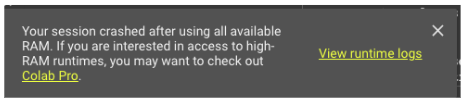

### Large dataset in a BigQuery Dataframes
https://cloud.google.com/python/docs/reference/bigframes/latest <br>

BigQuery DataFrames (preview) is a Python API that you can use to analyze data and perform machine learning tasks in BigQuery. BigQuery DataFrames consists of the following parts:

- bigframes.pandas implements a DataFrame API (with partial Pandas compatibility) on top of BigQuery.
- bigframes.ml implements a Python API for BigQuery ML (with partial scikit-learn compatibility)

In [ ]:
!pip install -q bigframes
import bigframes.pandas as bqdf

In [ ]:
#Authentication (if needed)

import os

if "GOOGLE_CLOUD_REGION" in os.environ:
  print("This notebook is running in Google Cloud. No additional authentication is needed")
else:
  print("This notebook is running in Google Colab.")
  from google.colab import auth
  auth.authenticate_user()

In [ ]:
# The following query will take approximatively 42 seconds to run

project_id = "<your-project-id>"

# Set BigQuery DataFrames options
bqdf.options.bigquery.project = project_id
bqdf.options.bigquery.location = "us"

# A query to read 50M rows form wikipedia dataset (YES, 50 M !!!)
large_query = f"""
   SELECT *
   FROM bigquery-samples.wikipedia_pageviews.200809h
   LIMIT 50000000
"""

# Reusing the query defined before: 50M rows
df_test = bqdf.read_gbq(large_query)

In [ ]:
# The df_test dataframe (BQ dataframe) is a pointer to a BQ table thant contains 50M rows
df_test

With BigQuery DataFrames, I can visualize and analyze large, **VERY LARGE** datasets <br>
A BQ DataFrames is a reference to a BQ table.

## 3: Read data using BQ DataFrames API

In [ ]:
bqdf.options.bigquery.project = project_id
bqdf.options.bigquery.location = "us"

# Read data from BQ table using BigFrames & SQL QUERY


sql_query = f"""
  SELECT user_pseudo_id,
    event_date as first_transaction_date,
    ecommerce.purchase_revenue as purchase_rev,
    geo.country as country,
    geo.continent as geo,
    device.category as device,
    device.operating_system as device_os,
    traffic_source.medium as source
  FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*`
  WHERE ecommerce.purchase_revenue >= 1
  ORDER BY first_transaction_date ASC
"""



df2 = bqdf.read_gbq(sql_query)
df2

In [ ]:
# Plotly libraries
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.box(df2, x="geo", y="purchase_rev", color = "device")

In [ ]:
fig.show()

# **DEMO 2:** ML Modeling - Predict purchase revenue

## 1: Demo 2 setup

In [ ]:
!pip install -q icecream
!pip install -q bigframes

import bigframes.pandas as bqdf
import pandas as pd
from google.cloud import bigquery
from icecream import ic

## 2: Quick ML model with BQ DataFrames ML API

The BigQuery Dataframes API is not limited to data analysis. It also provides capabilities to perform machine learning tasks in BigQuery. <br>


*   bigframes.ml




In [ ]:
project_id = "<your-project-id>"

# Set BigQuery DataFrames options
bqdf.options.bigquery.project = project_id
bqdf.options.bigquery.location = "us"

In [ ]:


# Read data from BQ table using BigFrames & SQL QUERY
# The data includ users interaction with website and app


sql_query = f"""
  SELECT user_pseudo_id,
    PARSE_DATE('%Y%m%d',event_date) AS first_transaction_date,
    ecommerce.purchase_revenue as purchase_rev,
    geo.country as country,
    geo.continent as geo,
    device.category as device,
    device.operating_system as device_os,
    traffic_source.medium as source
  FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*`
  WHERE ecommerce.purchase_revenue >= 1
  ORDER BY first_transaction_date ASC
"""



df = bqdf.read_gbq(sql_query)

ic("Read using BQ dataframes API completed")
df.columns
# df.shape
# df

In [ ]:
# The following code is for demo purpose only.
# A recommended practice would be to split the data into train, test (or train validation, test sets)

# Historical data : Everything before January 1st, 2021
historical_data = df[df['first_transaction_date'] < '2021-01-01']
# Recent data : From  January 1st, 2021 and after
recent_data = df[df['first_transaction_date'] >= '2021-01-01']

# training_data
# test_data

In [ ]:
# historical_data.shape
recent_data.shape

In [ ]:
# pick feature columns and label column
# feature_columns = training_data[['first_transaction_date', 'country', 'geo', 'device', 'device_os', 'source']]
# label_columns = training_data[['purchase_rev']]


# # pick feature columns and label column
feature_columns = recent_data[['first_transaction_date', 'country', 'geo', 'device', 'device_os', 'source']]
label_columns = recent_data[['purchase_rev']]

In [ ]:
# This cell will take a couple of minutes to complete (model training)

# Using the XGBRegressor from the bigframes.ml package
from bigframes.ml.ensemble import XGBRegressor
model = XGBRegressor()
# Here we pass the feature columns without transforms - BQML will then use
# automatic preprocessing to encode these columns
model.fit(feature_columns, label_columns)



In [ ]:
# check how the model performed
model.score(feature_columns, label_columns)

### Quick ML model results

The model is not very good, with a R-Squared value around 0.43. <br>
Feature engineering and model tuning should be considered to improve this model. <br> <br>
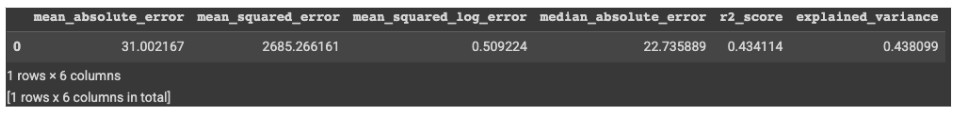

## 3: Refining ML modeling

In [ ]:
project_id = "<your-project-id>"
model_dataset = "AA_DevFest23"
client = bigquery.Client(location="US", project=project_id)

print(f"BQ client created using project ID: {client.project}")





Simple feature engineering. The query now includes:


*   Online data (location, date, device, source)
*   Online user behaviors (browsing activities)
*   CRM data (info on existing clients)




In [ ]:
# Simple feature engineering.
feature_eng_query = f"""
  With online_data AS (
    SELECT
      CONCAT('c',user_pseudo_id) AS ga_customer_id,
      PARSE_DATE('%Y%m%d',event_date) AS first_transaction_date,
      ecommerce.purchase_revenue as purchase_rev,
      geo.country as country,
      geo.continent as geo,
      device.category as device,
      device.operating_system as device_os,
      traffic_source.medium as source
    FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*`
    WHERE _TABLE_SUFFIX BETWEEN '20210101' AND '20210131' AND ecommerce.purchase_revenue IS NOT NULL)
    ,
    online_behavior AS (
      SELECT
          CONCAT('c',user_pseudo_id) AS customer_id,
          PARSE_DATE('%Y%m%d',event_date) AS event_date,
          SUM(CASE WHEN event_name = 'page_view' THEN 1 ELSE 0 END) AS ga_page_view_count,
          SUM(CASE WHEN event_name = 'view_item' THEN 1 ELSE 0 END) AS ga_view_item_count,
          MAX(CASE WHEN event_name = 'first_visit' THEN 1 ELSE 0 END) AS ga_first_visit,
          MAX(CASE WHEN event_name = 'view_promotion' THEN 1 ELSE 0 END) AS ga_view_promotion,
          MAX(CASE WHEN event_name = 'add_to_cart' THEN 1 ELSE 0 END) AS ga_add_to_cart,
          MAX(CASE WHEN event_name = 'begin_checkout' THEN 1 ELSE 0 END) AS ga_begin_checkout,
          MAX(CASE WHEN event_name IN ('purchase', 'in_app_purchase') THEN 1 ELSE 0 END) AS ga_online_purchase
      FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*`
      WHERE _TABLE_SUFFIX BETWEEN '20210101' AND '20210131'
      GROUP BY 1,2
    ),
    crm_data AS(
      SELECT customer_id AS crm_client_id,
      Age AS crm_age,
      Super_Saver_Club AS crm_club
      FROM `<your-project-id>.AA_DevFest23.crm_customer_info`
    )
  SELECT * EXCEPT (ga_customer_id,crm_client_id, customer_id ) FROM online_data
  LEFT JOIN crm_data
  ON online_data.ga_customer_id = crm_data.crm_client_id
  LEFT JOIN  online_behavior
  ON online_data.ga_customer_id = online_behavior.customer_id
  ORDER BY first_transaction_date
"""

In [ ]:
model_name = "xgb_devfest23_20231014"

training_query = f"""
  CREATE MODEL `{project_id}.{model_dataset}.{model_name}`
  OPTIONS(
    model_type="BOOSTED_TREE_REGRESSOR",
    num_parallel_tree=1,
    booster_type="gbtree",
    tree_method="auto",
    l1_reg=0.0,
    l2_reg=1.0,
    early_stop=True,
    learn_rate=0.3,
    max_iterations=20,
    min_rel_progress=0.01,
    enable_global_explain=True,
    xgboost_version="0.9",
    data_split_method="NO_SPLIT",
    INPUT_LABEL_COLS=["purchase_rev"])
  AS
  (
    {feature_eng_query}
  )
"""

In [ ]:
# Training will take approximatively 5 min to complete

# Running read job on BigQuery
training_job = client.query(
    training_query,
    location="US",
)  # API request - starts the query

training_job.result()  # Waits for the query to finish
ic("Model training completed")


In [ ]:
# Name of the model created before. Only used when access to another model is needed
# model_name = "xgb_devfest23_20231014"

In [ ]:
ml_evaluate_query = f"""
      SELECT *
      FROM ML.EVALUATE(MODEL `{project_id}.{model_dataset}.{model_name}`)
    """

ml_evaluate_job = client.query(
    ml_evaluate_query,
    location="US",
)  # API request - starts the query


ml_evaluate_job.result()  # Waits for the query to finish

evaluate = ml_evaluate_job.to_dataframe()
evaluate

Using simple feature engineering, the R-Squared has increased to 0.78. <br>
Model tuning should be considered to improve model predictions.

# **DEMO 3:** Generative AI with BigQuery

The following Generative AI features are now generally available (GA) in BigQuery ML:

- Creating a remote model based on the Vertex AI large language model (LLM) text-bison.
- Using the ML.GENERATE_TEXT function with an LLM-based remote model to perform generative natural language tasks on text stored in BigQuery tables.


The following demo is based the "[text-bison](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#foundation_models)" large language model (LLM) and the Google PaLM API.

## 1: Demo setup

In [ ]:
!pip install -q icecream

import pandas as pd
from google.cloud import bigquery
from icecream import ic


Before you start, you need to setup your environment as described in this turorial:

https://cloud.google.com/bigquery/docs/generate-text-tutorial


1. Verify required permissions
2. Create a dataset (remember the name for later)
3. Create a connection (remember the name for later)
4. Grant permissions to the connection

**STOP AFTER STEP 4** and do not complete the "**Create the remote model**" task. You will do it later in this Notebook.






In [ ]:
#Authentication (if needed)

import os

if "GOOGLE_CLOUD_REGION" in os.environ:
  print("This notebook is running in Google Cloud. No additional authentication is needed")
else:
  print("This notebook is running in Google Colab.")
  from google.colab import auth
  auth.authenticate_user()

ic("User authenticated")

In [ ]:
# MUST BE CHANGED: Project id and LLM model to create

# The id of your Google Cloud project
project_id = "<your-project-id>" #@param

# The name of the dataset you created during lab setupt
model_dataset = "DevFest23" #@param

# The name of the connection you created during setup. Something like "us.connection-vertex-llm"
llm_connection_name = "<your-connexion-to-llm>" #@param


In [ ]:
# Connection to BigQuery

client = bigquery.Client(location="US", project=project_id)
print(f"BQ client created using project ID: {client.project}")

In [ ]:
# # Create the view for the movie reviews

query = f"""
  CREATE OR REPLACE VIEW `{project_id}.{model_dataset}.review_examples`
  AS (
    SELECT * FROM `bigquery-public-data.imdb.reviews`
    WHERE movie_id in ('tt0202382', 'tt0163955', 'tt0462053')
    )

"""

bq_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

bq_job.result()  # Waits for the query to finish


ic("Review Examples view created")

## 2: Create connection to LLM remote model

In [ ]:
# MUST BE CHANGED: Give a name to the LLM model you want to create (e.g remote_llm_ga4)
genai_model = "remote_llm_devfest" #@param

In [ ]:
# Only run once to create the reference to the remote LLM model

query = f"""
  CREATE MODEL IF NOT EXISTS  {model_dataset}.{genai_model}
    REMOTE WITH CONNECTION {llm_connection_name}
    OPTIONS (remote_service_type = 'CLOUD_AI_LARGE_LANGUAGE_MODEL_V1')

"""

query_job = client.query(
    query,
    location="US",
)  # API request - starts the query


query_job.result()  # Waits for the query to finish
ic("Connection to Google Cloud Generative AI model created")
ic(model_dataset, genai_model)



## 3: Gen AI for Summary and classification

In [ ]:
#@title Brief overview of review data
query = f"""
    SELECT review, movie_id
    FROM {project_id}.{model_dataset}.review_examples
    ORDER BY movie_id
"""


query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = query_job.to_dataframe()
print(f"Read from review table completed.")
df.head(10)

In [ ]:
# DEMO PROMPT EXAMPLES

# "Summarize the review in a 3 bullet points"
# "Summarize the review in less than 60 words and give me the summary in French"
# "Identify if is rather a positive or a negative review, and explain why"
# "Identify review content about the actors"
# "Summarize positive feedback about the actors and negative feedback about the movie"
# "Give a rating for each review, from 1 to 5, 1 being an extremely negative value and 5 being a very positive review"


In [ ]:
prompt = "Summarize the review in a 3 bullet points" #@param

In [ ]:
# Use Generative AI to create a campaign decription based on information stored in BigQuery
# The prompt uses GA4 data: items.promotion_name

gen_ai_query = f"""

  SELECT *
    FROM
      ML.GENERATE_TEXT(
        MODEL {model_dataset}.{genai_model},
        (
        SELECT CONCAT('{prompt}: ',review) AS prompt
        FROM {project_id}.{model_dataset}.review_examples

        ),
        STRUCT(
          0.2 AS temperature, 600 AS max_output_tokens, 0.2 AS top_p, 15 AS top_k))
"""


print(f"Generative AI query set using prompt:  \"{prompt}\"")

In [ ]:
gen_ai_job = client.query(
    gen_ai_query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = gen_ai_job.to_dataframe()
df




---



## 4: Test multiple Gen AI parameters

* **Temperature**: [0.0,1.0] It controls the degree of randomness in token selection. Lower temperature values are good for prompts that require a more deterministic and less open-ended or creative response.

* **top_k**: [1,40] Top-K changes how the model selects tokens for output. A top-K of 1 means the next selected token is the most probable among all tokens in the model's vocabulary. Higher means more randomness (default is 40).

* **top_p**: [0.0,1.0] Top-P changes how the model selects tokens for output. Tokens are selected from the most (see top-K) to least probable until the sum of their probabilities equals the top-P value. Higher means more randomness(default is 0.95).



In [ ]:

# @markdown ### Update values below to test different GEN AI options
# @markdown ---

temp = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}
max_tokens = 650 #@param
top_k = 40 #@param
top_p = 0.95 #@param


# e.g
prompt = "Do something clever with BQ data" #@param

In [ ]:
# Use Generative AI to create a campaign decription based on information stored in BigQuery
# The STRUCT includes multiple query parameters to influence Gen AI responses

gen_ai_query = f"""

  SELECT *
    FROM
      "Summarize positive feedback about the actors and negative feedback about the movie"(
      MODEL {model_dataset}.{genai_model},
      (
      SELECT CONCAT('{prompt}', review) AS prompt
      FROM `{project_id}.{model_dataset}.imdb_reviews`
      LIMIT 5
      ),
      STRUCT(
        {temp} AS temperature, {max_tokens} AS max_output_tokens, {top_p} AS top_p, {top_k} AS top_k));

"""


ic("Generative AI query set. Ready to start generation")

In [ ]:
gen_ai_job = client.query(
    gen_ai_query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = gen_ai_job.to_dataframe()
df